# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
plt.style.use('seaborn')

# Import Dataset

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'1dRcFPQEzj-DsUkF4xEto7sqI0EFt9oUz'}) 
downloaded.GetContentFile('application_data.csv') 

In [ ]:
downloaded = drive.CreateFile({'id':'17DKo6Jv8mXsbwRsII2xY-ED3t1UnhKgw'}) 
downloaded.GetContentFile('record_data.csv') 

In [ ]:
application_data = pd.read_csv('application_data.csv')

In [ ]:
record_data = pd.read_csv('record_data.csv')

# Data Understanding

#### See The First 5 Data


In [ ]:
application_data.head(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
record_data.head(5)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


### See the number of rows and column of data

1.   List item
2.   List item



In [ ]:
application_data.shape

(438557, 18)

In [ ]:
record_data.shape

(1048575, 3)

### Understanding Type of Data Each Variable

In [ ]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [ ]:
record_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


### See a statistical summary of variables with numeric types

In [ ]:
application_data.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [ ]:
record_data.describe()

,ID,MONTHS_BALANCE
count,1.048575e+06,1.048575e+06
mean,5.068286e+06,-1.913700e+01
std,4.615058e+04,1.402350e+01
min,5.001711e+06,-6.000000e+01
25%,5.023644e+06,-2.900000e+01
50%,5.062104e+06,-1.700000e+01
75%,5.113856e+06,-7.000000e+00
max,5.150487e+06,0.000000e+00


### Quick Summarize Dataset

1.   List item
2.   List item



**Dataset Application_data Mencakup Informasi Tentang** :  
- Terdapat 438557 baris data & 18 kolom
- Dari 18 kolom tersebut, 8 diantaranya bertype data Kategorikal / Object. dan 10 lainnya bertype data Numerik / integer
- Dataset berisi tentang informasi data customer yang telah mengajukan aplikasi untuk mendapatkan kartu credit. seperti data jenis kelamin, umur,pendidikan terakhir, status perkawinan, jumlah anggota keluarga.
- Lalu informasi tentang kepemilikian aset customer, seperti mobil, rumah, handphone, tipe rumah.
- Dan informasi tentang Pekerjaan customer, seperti jenis pekerjaan, pendapatan per bulan, jenis penghasilan dan tahun pengalaman kerja

**Dataset Record_data Mencakup Informasi Tentang** :
- Terdapat 1048575 baris data & 3 kolom
- 2 kolom diantaranya bertype data Numerik / integer , dan 1 lainnya bertipe Kategorikal / Objeck.
- Dataset berisi tentang, ID pelanggan yaitu kode unik setiap pelanggan yang melakukan kredit.
- Lalu, month_balance yaitu jika 0 maka bulan ini, jika -1 bulan sebelumnya, jika -2 dua bulan sebelumnya. dan seterusnya
- Dan STATUS --->
0: 1-29 hari lewat jatuh tempo,
1: 30-59 hari lewat jatuh tempo,
2: 60-89 hari lewat jatuh tempo,
3: 90-119 hari lewat jatuh tempo,
4: 120-149 hari lewat jatuh tempo,
5: Utang terlambat atau macet, lebih dari 150 hari,
C: lunas bulan itu,
X: Tidak ada pinjaman untuk bulan ini.


# Data Cleaning

### Check Duplicate Data

In [ ]:
application_data.duplicated().any()

False

In [ ]:
record_data.duplicated().any()

False

In [ ]:
application_data=application_data.drop_duplicates()

In [ ]:
record_data = record_data.drop_duplicates()

In [ ]:
application_data.shape

(438557, 18)

In [ ]:
record_data.shape

(1048575, 3)

### Check Missing Value

In [ ]:
application_data.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [ ]:
record_data.isna().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

### Check Every Value / Strange Value Each Column

In [ ]:
nama_kolom_application = application_data.columns

In [ ]:
nama_kolom_record = record_data.columns

In [ ]:
for i in nama_kolom_application:
  print(i,application_data[i].unique())

ID [5008804 5008805 5008806 ... 6841878 6842765 6842885]
CODE_GENDER ['M' 'F']
FLAG_OWN_CAR ['Y' 'N']
FLAG_OWN_REALTY ['Y' 'N']
CNT_CHILDREN [ 0  1  3  2  4  5 14 19  7  9 12  6]
AMT_INCOME_TOTAL [ 427500.    112500.    270000.    283500.    135000.    130500.
  157500.    405000.    211500.    360000.    126000.    315000.
  247500.    297000.    225000.    166500.    216000.    255150.
  148500.    202500.     94500.    450000.    180000.     90000.
  765000.    382500.    144000.    229500.    292500.     74250.
   40500.    337500.    193500.    267750.    139500.     67500.
  252000.    900000.    115290.    279000.     76500.    234000.
   81000.    108000.     99000.    198000.     45000.    238500.
  117000.    153000.   1350000.    445500.    495000.     85500.
  306000.    562500.    189000.    328500.    310500.    540000.
  171000.    675000.    121500.     72000.     65250.    184500.
  103500.    162000.    165150.     54000.    243000.    256500.
   33300.    697500.    

In [ ]:
for i in nama_kolom_record:
  print(i, record_data[i].unique())

ID [5001711 5001712 5001713 ... 5150484 5150485 5150487]
MONTHS_BALANCE [  0  -1  -2  -3  -4  -5  -6  -7  -8  -9 -10 -11 -12 -13 -14 -15 -16 -17
 -18 -19 -20 -21 -22 -23 -24 -25 -26 -27 -28 -29 -30 -31 -32 -33 -34 -35
 -36 -37 -38 -39 -40 -41 -42 -43 -44 -45 -46 -47 -48 -49 -50 -51 -52 -53
 -54 -55 -56 -57 -58 -59 -60]
STATUS ['X' '0' 'C' '1' '2' '3' '4' '5']


### Impute Missing value



In [ ]:
#change days birth value from day to year
application_data['DAYS_BIRTH']= abs(round(application_data['DAYS_BIRTH']/-365.0))

In [ ]:
application_data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,62.0,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,44.0,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,22.0,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,59.0,365243,1,0,0,0,NaN,2.0


In [ ]:
#change days birth value from day to year
application_data['DAYS_EMPLOYED']= abs(round(application_data['DAYS_EMPLOYED']/-365,0))

In [ ]:
application_data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,62.0,1001.0,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,44.0,8.0,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,22.0,1.0,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,59.0,1001.0,1,0,0,0,NaN,2.0


In [ ]:
application_data["OCCUPATION_TYPE"]=application_data["OCCUPATION_TYPE"].fillna('Unknown')

In [ ]:
application_data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,1,1,0,0,Unknown,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,1,1,0,0,Unknown,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,62.0,1001.0,1,0,0,0,Unknown,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,44.0,8.0,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,22.0,1.0,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,59.0,1001.0,1,0,0,0,Unknown,2.0


In [ ]:
record_data['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

## Target Labelling

In [ ]:
#Mencari ID mana saja yang mengandung STATUS 0,1,2,3,4,5 dan dianggap Bad Customer karena pernah melakukan telat bayar

id_bad = record_data[(record_data["STATUS"] == '0') 
                    | (record_data["STATUS"] == '1') 
                    | (record_data["STATUS"] == '2') 
                    |(record_data["STATUS"] == '3') 
                    | (record_data["STATUS"] == '4') 
                    | (record_data["STATUS"] == '5')]['ID'].unique()

In [ ]:
id_bad

array([5001711, 5001712, 5001717, ..., 5150482, 5150484, 5150485])

In [ ]:
#Mengubah ID_BAD menjadi status 0 (Bad Customer) 
for i in id_bad:
  record_data.loc[record_data['ID']==i, 'STATUS'] = 0

KeyboardInterrupt: ignored

In [ ]:
record_data['STATUS'].value_counts()

In [ ]:
#Mencari ID mana saja yang mengandung STATUS X atau C dan dianggap Good Customer karena tidak pernah melakukan telat bayar
id_good = record_data[(record_data["STATUS"] == 'X') | (record_data["STATUS"] == 'C')]['ID'].unique()

In [ ]:
#Mengubah ID_good menjadi status 1 (Good Customer) 
for i in id_good:
  record_data.loc[record_data['ID']==i, 'STATUS'] = 1

In [ ]:
record_data[record_data['ID'] == 5002291]

In [ ]:
record_data_clean = record_data.drop_duplicates(subset=['ID'])

In [ ]:
record_data_clean['ID'].nunique()

In [ ]:
application_data['ID'].nunique()

In [ ]:
record_data['ID'].nunique()

In [ ]:
record_data

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [ ]:
#Karena Month_Balance sudah tidak lagi diperlukan sehingga kolom di drop
record_data_final = record_data_clean.drop(['MONTHS_BALANCE'],axis=1)
record_data_final

NameError: ignored

In [ ]:
#Merging 2 CSV Final 
final_df = pd.merge(application_data, record_data_final, on = 'ID', how = 'inner')

NameError: ignored

In [ ]:
downloaded = drive.CreateFile({'id':'10Pa7a5R8O9rrYdLumJ_Fztpay_LULE6k'}) 
downloaded.GetContentFile('final_df.csv') 

In [ ]:
final_df = pd.read_csv('final_df.csv')

In [ ]:
final_df.to_csv('final_df.csv',index=False)

In [ ]:
final_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,1,1,0,0,Unknown,2.0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,1,1,0,0,Unknown,2.0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,1,0,0,0,Security staff,2.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1,0,1,1,Sales staff,1.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1,0,1,1,Sales staff,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,48.0,7.0,1,0,0,0,Managers,2.0,0
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,34.0,4.0,1,0,1,1,Medicine staff,2.0,0
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,34.0,4.0,1,0,1,1,Medicine staff,2.0,0
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,49.0,2.0,1,0,0,0,Sales staff,2.0,0


In [ ]:
final_df.shape

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
final_df = final_df.rename({'DAYS_BIRTH': 'YEARS_BIRTH', 'DAYS_EMPLOYED': 'YEARS_EMPLOYED'}, axis=1) 
final_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_BIRTH,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,1,1,0,0,Unknown,2.0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,1,1,0,0,Unknown,2.0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,1,0,0,0,Security staff,2.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1,0,1,1,Sales staff,1.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1,0,1,1,Sales staff,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,48.0,7.0,1,0,0,0,Managers,2.0,0
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,34.0,4.0,1,0,1,1,Medicine staff,2.0,0
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,34.0,4.0,1,0,1,1,Medicine staff,2.0,0
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,49.0,2.0,1,0,0,0,Sales staff,2.0,0


##Detect Outliers

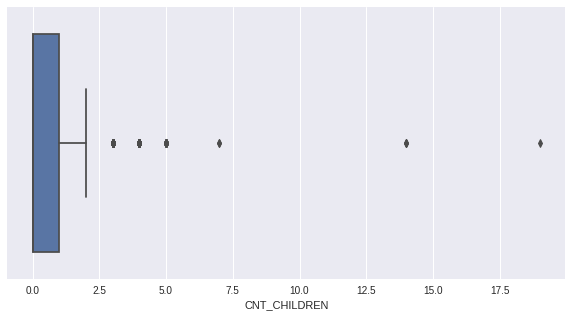

In [ ]:
#detect outliers CNT_CHILDREN
plt.figure(figsize=(10,5))
sns.boxplot(final_df["CNT_CHILDREN"])
plt.show()

In [ ]:
final_df["CNT_CHILDREN"].value_counts()

0     25201
1      7492
2      3256
3       419
4        63
5        20
14        3
7         2
19        1
Name: CNT_CHILDREN, dtype: int64

In [ ]:
final_df[(final_df['CNT_CHILDREN']==19) | (final_df['CNT_CHILDREN']==14)]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_BIRTH,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
14671,5061207,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,49.0,5.0,1,0,0,0,Drivers,15.0,0
14672,5061210,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,49.0,5.0,1,0,0,0,Drivers,15.0,0
14673,5061211,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,49.0,5.0,1,0,0,0,Drivers,15.0,0
25412,5105054,F,N,Y,19,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,30.0,5.0,1,1,1,0,Waiters/barmen staff,20.0,0


In [ ]:
##Catatan tidak ada yg good customer extreme dengan value 14 & 19 anak, Sehingga data dengan anak lebih dari 7 dibuang
final_df = final_df.drop(final_df[final_df.CNT_CHILDREN >7].index)

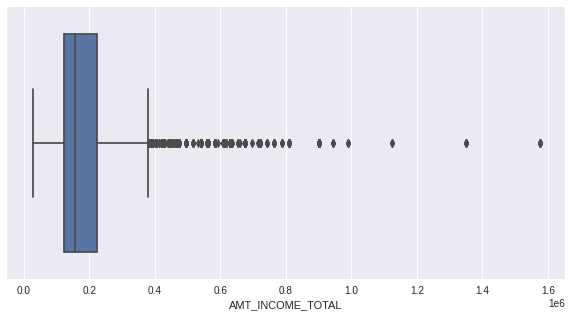

In [ ]:
#detect outliers AMT_INCOME_TOTAL
plt.figure(figsize=(10,5))
sns.boxplot(final_df["AMT_INCOME_TOTAL"])
plt.show()

In [ ]:
final_df["AMT_INCOME_TOTAL"].value_counts()

135000.0    4309
180000.0    3097
157500.0    3089
112500.0    2955
225000.0    2923
            ... 
531000.0       1
145350.0       1
44550.0        1
661500.0       1
31950.0        1
Name: AMT_INCOME_TOTAL, Length: 265, dtype: int64

In [ ]:
final_df["AMT_INCOME_TOTAL"].max()

1575000.0

In [ ]:
final_df[final_df["AMT_INCOME_TOTAL"]==1575000.0]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
33985,5143231,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,28.0,7.0,1,0,0,0,Managers,2.0,0
33986,5143232,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,28.0,7.0,1,0,0,0,Managers,2.0,0
33987,5143233,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,28.0,7.0,1,0,0,0,Managers,2.0,0
33988,5143234,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,28.0,7.0,1,0,0,0,Managers,2.0,0
33989,5143235,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,28.0,7.0,1,0,0,0,Managers,2.0,0
33990,5143236,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,28.0,7.0,1,0,0,0,Managers,2.0,0
33991,5143237,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,28.0,7.0,1,0,0,0,Managers,2.0,0
33992,5143238,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,28.0,7.0,1,0,0,0,Managers,2.0,0


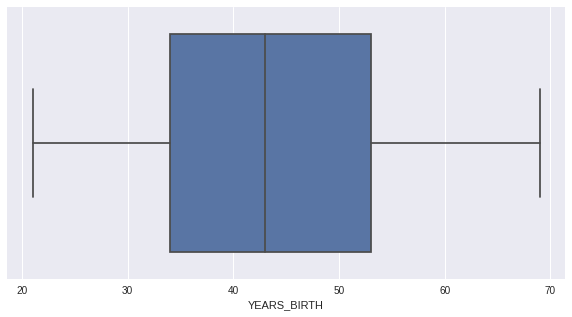

In [ ]:
#detect outliers YEARS_BIRTH
plt.figure(figsize=(10,5))
sns.boxplot(final_df["YEARS_BIRTH"])
plt.show()


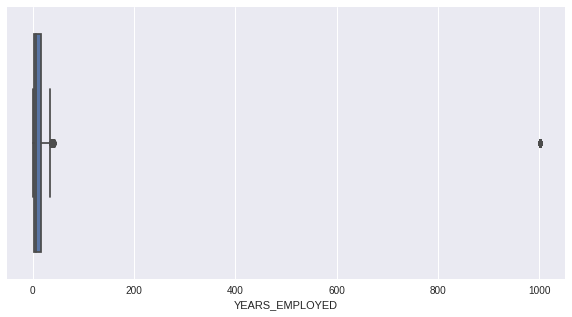

In [ ]:
#detect outliers YEARS_EMPLOYED
plt.figure(figsize=(10,5))
sns.boxplot(final_df["YEARS_EMPLOYED"])
plt.show()


In [ ]:
#Data dengan outliers extreme tidak dibuang, karena data tersebut cukup banyak dilabeli target 1 
final_df[(final_df['YEARS_EMPLOYED']==1001.0) & (final_df['STATUS']==1) ]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_BIRTH,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
507,5009436,F,N,N,0,76500.0,Pensioner,Secondary / secondary special,Married,House / apartment,64.0,1001.0,1,0,0,0,Unknown,2.0,1
509,5009438,F,N,N,0,76500.0,Pensioner,Secondary / secondary special,Married,House / apartment,64.0,1001.0,1,0,0,0,Unknown,2.0,1
510,5009439,F,N,N,0,76500.0,Pensioner,Secondary / secondary special,Married,House / apartment,64.0,1001.0,1,0,0,0,Unknown,2.0,1
511,5009440,F,N,N,0,76500.0,Pensioner,Secondary / secondary special,Married,House / apartment,64.0,1001.0,1,0,0,0,Unknown,2.0,1
624,5009592,F,N,N,0,112500.0,Pensioner,Secondary / secondary special,Single / not married,Rented apartment,64.0,1001.0,1,0,1,0,Unknown,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36038,5150284,F,N,Y,0,132750.0,Pensioner,Secondary / secondary special,Separated,House / apartment,56.0,1001.0,1,0,0,0,Unknown,1.0,1
36039,5150285,F,N,Y,0,132750.0,Pensioner,Secondary / secondary special,Separated,House / apartment,56.0,1001.0,1,0,0,0,Unknown,1.0,1
36040,5150286,F,N,Y,0,132750.0,Pensioner,Secondary / secondary special,Separated,House / apartment,56.0,1001.0,1,0,0,0,Unknown,1.0,1
36080,5150410,F,N,Y,0,67500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,61.0,1001.0,1,0,0,0,Unknown,1.0,1


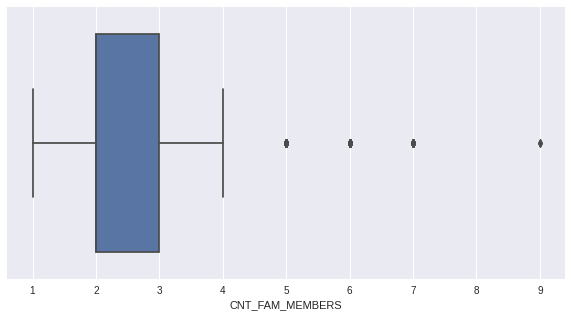

In [ ]:
#detect outliers CNT_FAM_MEMBERS
plt.figure(figsize=(10,5))
sns.boxplot(final_df["CNT_FAM_MEMBERS"])
plt.show()


In [ ]:
#Data dengan anak yang lebih 7 sudah terhapus, otomotasi di data member keluarga juga terhapus
final_df['CNT_FAM_MEMBERS'].value_counts()

2.0    19463
1.0     6987
3.0     6421
4.0     3106
5.0      397
6.0       58
7.0       19
9.0        2
Name: CNT_FAM_MEMBERS, dtype: int64

# Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

#Data PreProcessing

In [ ]:
#copy data
final_df2 = final_df.copy()

##Labelling Data

In [ ]:
#kolom numerikal
num_cols = ['AMT_INCOME_TOTAL', 'YEARS_BIRTH', 'YEARS_EMPLOYED']
#kolom kategorikal biner
bin_cols = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
#kolom kategorikal lebih dari 2
multi_cols = ['OCCUPATION_TYPE' ,'NAME_FAMILY_STATUS' ,'NAME_INCOME_TYPE', 'NAME_HOUSING_TYPE']
#kolom ordinal
ordinal_cols = ['NAME_EDUCATION_TYPE']

In [ ]:
final_df['NAME_EDUCATION_TYPE'].unique()

array(['Higher education', 'Secondary / secondary special',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [ ]:
#Ubah data kategorikal education type, menjadi data numerik ordinal
edu_replace = {
    'NAME_EDUCATION_TYPE' : {'Higher education' : 3,'Secondary / secondary special':1 , 'Incomplete higher':2,'Lower secondary':0, 'Academic degree':4 }
}
final_df.replace(edu_replace, inplace=True)

In [ ]:
#Ubah data kategorikal biner, menjadi data numerik biner
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in bin_cols:
  final_df[i]= le.fit_transform(final_df[i])

In [ ]:
#Ubah data kolom kategorikal lebih dari 2

final_df=pd.get_dummies(data = final_df,columns = multi_cols,drop_first=False)

In [ ]:
final_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,YEARS_BIRTH,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Unknown,OCCUPATION_TYPE_Waiters/barmen staff,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,5008804,1,1,1,0,427500.0,3,33.0,12.0,1,1,0,0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,5008805,1,1,1,0,427500.0,3,33.0,12.0,1,1,0,0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,5008806,1,1,1,0,112500.0,1,59.0,3.0,1,0,0,0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,5008808,0,0,1,0,270000.0,1,52.0,8.0,1,0,1,1,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
4,5008809,0,0,1,0,270000.0,1,52.0,8.0,1,0,1,1,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,1,1,1,0,315000.0,1,48.0,7.0,1,0,0,0,2.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
36453,5149834,0,0,1,0,157500.0,3,34.0,4.0,1,0,1,1,2.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
36454,5149838,0,0,1,0,157500.0,3,34.0,4.0,1,0,1,1,2.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
36455,5150049,0,0,1,0,283500.0,1,49.0,2.0,1,0,0,0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0


## Data Partition

In [ ]:
#Hitung Jumlah Target Variabel 0 &1
final_df['STATUS'].value_counts()

0    31998
1     4455
Name: STATUS, dtype: int64

In [ ]:
final_df=final_df.drop(labels="ID",axis=1)


In [ ]:
#Partisi Data 80 20
from sklearn.model_selection import train_test_split

##partition data into data training and data testing
train,test = train_test_split(final_df,test_size = 0.20 ,random_state = 123)
    
##seperating dependent and independent variables on training and testing data
train_X = train.drop(labels='STATUS',axis=1)
train_Y = train['STATUS']
test_X  = test.drop(labels='STATUS',axis=1)
test_Y  = test['STATUS']

## Scalling Data

In [ ]:
#Scalling menggunakan MinMax Scaller, karena distribusi data tidak normal 

from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
train_X[num_cols]=mms.fit_transform(train_X[num_cols])
train_X

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,YEARS_BIRTH,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Unknown,OCCUPATION_TYPE_Waiters/barmen staff,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
12866,0,0,1,0,0.084302,1,0.916667,1.000000,1,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
7126,1,1,0,1,0.156977,3,0.291667,0.000999,1,0,1,0,3.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
36285,0,1,1,0,0.031977,3,0.583333,0.011988,1,0,0,0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
13346,0,0,1,1,0.069767,3,0.333333,0.009990,1,0,0,0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
35767,0,0,1,0,0.069767,2,0.125000,0.005994,1,0,1,1,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7763,1,0,0,0,0.063953,1,0.729167,1.000000,1,0,0,0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
15380,1,1,0,0,0.098837,1,0.145833,0.004995,1,1,1,0,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
17733,1,0,1,1,0.055233,1,0.354167,0.000999,1,0,0,0,3.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
28034,1,0,1,0,0.055233,1,0.833333,1.000000,1,0,1,0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


## Balancing Data

In [ ]:
#handle imbalance class using oversampling minority class with smote method
from imblearn.over_sampling import SMOTE

os = SMOTE(sampling_strategy='auto',random_state = 123,k_neighbors=5)
train_smote_X,train_smote_Y = os.fit_resample(train_X,train_Y)
train_smote_X = pd.DataFrame(data = train_smote_X,columns=train_X.columns)
train_smote_Y = pd.DataFrame(data = train_smote_Y)

In [ ]:
#Proportion before smote
train_Y.value_counts()

0    25620
1     3542
Name: STATUS, dtype: int64

In [ ]:
#Proportion after smote
train_smote_Y.value_counts()

1    25620
0    25620
dtype: int64

# Modelling

## K-Nearest Neighboor ( KNN )

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k = round(np.sqrt(train_smote_X.shape[0]))
k

226

In [ ]:
model_KNN = KNeighborsClassifier()

In [ ]:
#training data
model_KNN.fit(train_smote_X, train_smote_Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred_knn = model_KNN.predict(test_X)


In [ ]:
print(classification_report(test_Y, y_pred_knn))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      6378
           1       0.00      0.00      0.00       913

    accuracy                           0.87      7291
   macro avg       0.44      0.50      0.47      7291
weighted avg       0.77      0.87      0.82      7291



0.5

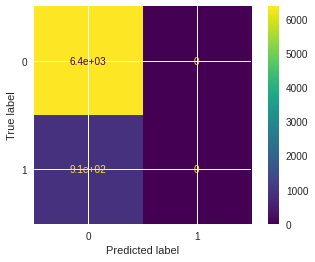

In [ ]:
plot_confusion_matrix(model_KNN, test_X, test_Y)

roc_auc_score(test_Y, y_pred_knn)


In [ ]:
print('KNN Model Accuracy : ', model_KNN.score(train_smote_X, train_smote_Y)*100, '%')

KNN Model Accuracy :  87.44145199063233 %


## XGBoost

XGBoost Model Accuracy :  76.3680718188915 %

Confusion matrix :

Classification report:
              precision    recall  f1-score   support

           0       0.71      0.89      0.79     25620
           1       0.85      0.64      0.73     25620

    accuracy                           0.76     51240
   macro avg       0.78      0.76      0.76     51240
weighted avg       0.78      0.76      0.76     51240



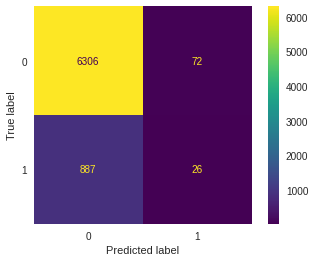

In [ ]:
# XGBoost  classification

from xgboost import XGBClassifier

XGB_model = XGBClassifier()

XGB_model.fit(train_smote_X, train_smote_Y)

print('XGBoost Model Accuracy : ', XGB_model.score(train_smote_X, train_smote_Y)*100, '%')

prediction = XGB_model.predict(train_smote_X)
print('\nConfusion matrix :')

plot_confusion_matrix(XGB_model,test_X, test_Y,values_format='')
plt.grid(False)
      
print('\nClassification report:')      
print(classification_report(train_smote_Y, prediction))

## roc_auc_score 

XGBoost Model Accuracy :  76.3680718188915 %

Confusion matrix :

Classification report:
              precision    recall  f1-score   support

           0       0.71      0.89      0.79     25620
           1       0.85      0.64      0.73     25620

    accuracy                           0.76     51240
   macro avg       0.78      0.76      0.76     51240
weighted avg       0.78      0.76      0.76     51240



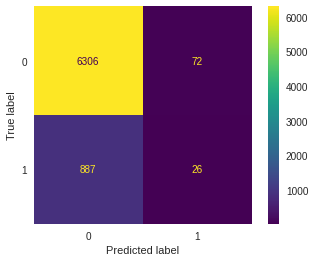

In [ ]:
# XGBoost  classification

from xgboost import XGBClassifier

XGB_model = XGBClassifier()

XGB_model.fit(train_smote_X, train_smote_Y)

print('XGBoost Model Accuracy : ', XGB_model.score(train_smote_X, train_smote_Y)*100, '%')

prediction = XGB_model.predict(train_smote_X)
print('\nConfusion matrix :')

plot_confusion_matrix(XGB_model,test_X, test_Y,values_format='')
plt.grid(False)
      
print('\nClassification report:')      
print(classification_report(train_smote_Y, prediction))

##Hyper Parameter XGBoost

In [ ]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [ ]:
%%time

from sklearn.model_selection import RandomizedSearchCV

xgboost_random = RandomizedSearchCV(estimator= XGBClassifier(),
                                param_distributions = params,
                                cv=5,
                                n_iter=100,
                                n_jobs=-1)

xgboost_random.fit(train_smote_X,train_smote_Y)

In [ ]:
xgboost_random.best_params_

In [ ]:
# XGBoost  classification

from xgboost import XGBClassifier

XGB_model_best_params = XGBClassifier(colsample_bytree= 1,
 gamma= 2,
 max_depth= 5,
 min_child_weight= 1,
 subsample= 0.6)

XGB_model_best_params.fit(train_smote_X, train_smote_Y)

print('XGBoost Model Accuracy : ', XGB_model_best_params.score(train_smote_X, train_smote_Y)*100, '%')

prediction = XGB_model_best_params.predict(train_smote_X)
print('\nConfusion matrix :')

plot_confusion_matrix(XGB_model_best_params,test_X, test_Y,values_format='')
plt.grid(False)
      
print('\nClassification report:')      
print(classification_report(train_smote_Y, prediction))

## SVC

In [ ]:
from sklearn.svm import SVC

model_svm = SVC()

model_svm.fit(train_smote_X, train_smote_Y)

# buat predict
predict_svm = model_svm.predict(test_X)

In [ ]:
print(classification_report(test_Y, predict_svm))
plot_confusion_matrix(model_svm, test_X, test_Y)
#print(roc_auc_score(test_Y, predict_svm))

print('model_svm: ', model_svm.score(train_smote_X, train_smote_Y)*100, '%')

ValueError: ignored

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()

model_dt.fit(train_smote_X, train_smote_Y)

predict_dt = model_dt.predict(test_X)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6378
           1       0.14      0.08      0.10       913

    accuracy                           0.82      7291
   macro avg       0.51      0.51      0.50      7291
weighted avg       0.78      0.82      0.80      7291



0.5054050118201362

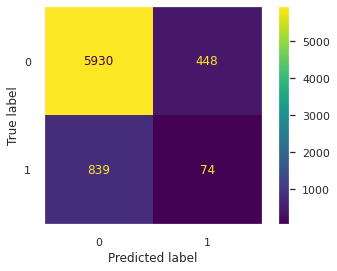

In [ ]:
print(classification_report(test_Y, predict_dt))
plot_confusion_matrix(model_dt, test_X, test_Y,values_format='')
plt.grid(False)

print('accuracy model_dt: ', model_dt.score(train_smote_X, train_smote_Y)*100, '%')

roc_auc_score(test_Y, predict_dt)

In [ ]:
final_df2.corr()

In [ ]:
sns.heatmap(final_df.corr(),annot=True)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_LR = LogisticRegression()

In [ ]:
#training model
model_LR.fit(train_smote_X, train_smote_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_LR = model_LR.predict(test_X)

## Evaluation

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score

In [ ]:
print(classification_report(test_Y, y_pred_LR))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6378
           1       0.13      1.00      0.22       913

    accuracy                           0.13      7291
   macro avg       0.06      0.50      0.11      7291
weighted avg       0.02      0.13      0.03      7291



accuracy LR:  53.81537861046057 %


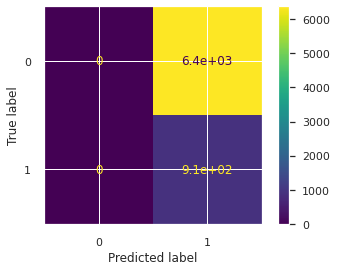

In [ ]:
plot_confusion_matrix(model_LR, test_X, test_Y)


print('accuracy LR: ' , model_LR.score(train_smote_X, train_smote_Y)*100, '%')



In [ ]:
roc_auc_score(test_Y, y_pred_LR)

0.5

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()

model_rf.fit(train_smote_X, train_smote_Y)

predict_rf = model_rf.predict(test_X)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93      6378
           1       0.45      0.01      0.02       913

    accuracy                           0.87      7291
   macro avg       0.66      0.50      0.48      7291
weighted avg       0.82      0.87      0.82      7291



0.5040664668423115

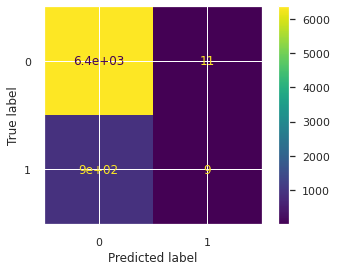

In [ ]:
print(classification_report(test_Y, predict_rf))

plot_confusion_matrix(model_rf, test_X, test_Y)

In [ ]:
print('accuracy RF: ' , model_rf.score(train_smote_X, train_smote_Y)*100, '%')

accuracy RF:  91.72888246100926 %


## Feature Selection

In [ ]:
final_df2.corr()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,YEARS_BIRTH,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
ID,1.000000,0.029721,-0.017643,-0.056055,-0.038804,NaN,0.079170,0.009831,-0.046985,0.027115,0.011486
CNT_CHILDREN,0.029721,1.000000,0.034402,-0.346788,-0.235543,NaN,0.048735,-0.016758,0.017032,0.886245,-0.003094
AMT_INCOME_TOTAL,-0.017643,0.034402,1.000000,-0.067707,-0.168028,NaN,-0.037695,0.017297,0.086687,0.024028,0.014417
YEARS_BIRTH,-0.056055,-0.346788,-0.067707,1.000000,0.624272,NaN,-0.179023,0.028324,-0.105563,-0.307828,-0.002719
YEARS_EMPLOYED,-0.038804,-0.235543,-0.168028,0.624272,1.000000,NaN,-0.242565,-0.005832,-0.086984,-0.224823,0.000376
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_WORK_PHONE,0.079170,0.048735,-0.037695,-0.179023,-0.242565,NaN,1.000000,0.311571,-0.034838,0.065035,0.003265
FLAG_PHONE,0.009831,-0.016758,0.017297,0.028324,-0.005832,NaN,0.311571,1.000000,0.010452,-0.004361,0.005618
FLAG_EMAIL,-0.046985,0.017032,0.086687,-0.105563,-0.086984,NaN,-0.034838,0.010452,1.000000,0.015356,-0.008720
CNT_FAM_MEMBERS,0.027115,0.886245,0.024028,-0.307828,-0.224823,NaN,0.065035,-0.004361,0.015356,1.000000,-0.000767


**Dataset Application_data Mencakup Informasi Tentang** :  
- Terdapat 438557 baris data & 18 kolom
- Dari 18 kolom tersebut, 8 diantaranya bertype data Kategorikal / Object. dan 10 lainnya bertype data Numerik / integer
- Dataset berisi tentang informasi data customer yang telah mengajukan aplikasi untuk mendapatkan kartu credit. seperti data jenis kelamin, umur,pendidikan terakhir, status perkawinan, jumlah anggota keluarga.
- Lalu informasi tentang kepemilikian aset customer, seperti mobil, rumah, handphone, tipe rumah.
- Dan informasi tentang Pekerjaan customer, seperti jenis pekerjaan, pendapatan per bulan, jenis penghasilan dan tahun pengalaman kerja

**Dataset Record_data Mencakup Informasi Tentang** :
- Terdapat 1048575 baris data & 3 kolom
- 2 kolom diantaranya bertype data Numerik / integer , dan 1 lainnya bertipe Kategorikal / Objeck.
- Dataset berisi tentang, ID pelanggan yaitu kode unik setiap pelanggan yang melakukan kredit.
- Lalu, month_balance yaitu jika 0 maka bulan ini, jika -1 bulan sebelumnya, jika -2 dua bulan sebelumnya. dan seterusnya
- Dan STATUS --->
0: 1-29 hari lewat jatuh tempo,
1: 30-59 hari lewat jatuh tempo,
2: 60-89 hari lewat jatuh tempo,
3: 90-119 hari lewat jatuh tempo,
4: 120-149 hari lewat jatuh tempo,
5: Utang terlambat atau macet, lebih dari 150 hari,
C: lunas bulan itu,
X: Tidak ada pinjaman untuk bulan ini.


#Catatan
1. Gabungkan 2 CSV jadi 1 (Inner Join)
2. Gali lebih dalam informasi tentang Status X apakah ID yang berlabel status X itu pernah minjem atau engga.
3*. Cek Ada X dan tidak ada angka 0-5. (Ini bertujuan untuk memfilter customer mana yang tidak pernah meminjam duit sama sekali. Id(user) sesuai kondisi ini bisa dibuang/ didrop karena tidak membantu machine learning menentukan jenis customer mana yang bisa dikategorikan "good customer"
4. EDA (visualisasi per masing2 kolom untuk menemukan pola atau pattern yang bisa dijadikan insights.(box plot dll)
5. Data Preprocessing. Ubah data kategorikal menjadi numerical(label encoder, dummy variable one hot encoder) Sk
6. Scalling menggunakan Min Max
7. Ubah Target Label "STATUS" menjadi binary 0/1 . Good Client & Bad Client.
1 = Good Client (C & X) 
0 = Bad Client
8. Hitung Berapa Jumlah Status 0 & 1 untuk membalance Data.
9. Split data train test train:80 traing:20
10. Perhatikan Melakukan Oversampling. Data Partition (split) terlebih dahulu, baru kemudian lakukan Balance (oversampling/undersampling).
11. Modelling Logistic regression, Random Forest, KNN .
12. Classification Report Evaluasi . Confussion Matrix, dll.
FP, TP, FN, TN

Positif = 1 (Good)
Negatif = 0 (Bad)

FP : False Positif, Mesin Memprediksi Positif(Good) Aktual Negatif(Bad)
FN : False Negatif, Mesin Memprediksi Negatif(Bad) Aktual Positif(Good)

A : Jenis Error manakah yang harus di tekan (serendah mungkin) untuk menguntungkan perusahaan perbankan? FP , Precision 1 Recall 0

B : Jenis Error manakah yang harus di tekan (serendah mungkin) untuk menguntungkan Customer? FN

13. Comparison Model No.11, mencari yang terbaik
14. Hyper Parameter Tuning (Random), lebih baik atau tidak
15. Feature Selection, korelasi kolom yang paling berpengaruh terhadap target "status".

